<H1>Módulo 8: Series Temporales con Machine Learning: Random Forest y XGBoost</H1>

- **Conceptos clave**:
  - Uso de machine learning para series temporales.
  - Comparación entre modelos tradicionales y machine learning.
  - Entrenamiento de Random Forest y XGBoost para series temporales, manejo de features temporales.
- **Proyecto**: Implementar Random Forest y XGBoost para predicción de series temporales.
  - Comparar el desempeño de Random Forest y XGBoost en la predicción de precios de acciones o demanda de productos, utilizando métricas de evaluación y técnicas de validación cruzada.


<H1>Marco Teórico: Predicción de Series Temporales con Machine Learning
</H1>

1. **Introducción a las Series Temporales**

Una **serie temporal** es una secuencia de observaciones de una variable en función del tiempo. Los principales componentes de una serie temporal son:

- **Tendencia (T)**: Movimiento general de largo plazo en los datos.
- **Estacionalidad (S)**: Fluctuaciones periódicas.
- **Ciclo (C)**: Oscilaciones irregulares.
- **Ruido (N)**: Variaciones aleatorias.

La representación matemática de una serie temporal $ Y_t$  puede ser expresada como:
$ Y_t = T_t + S_t + C_t + N_t $

2. **Modelos Tradicionales vs. Machine Learning en Series Temporales**

2.1. **Modelos Estadísticos Tradicionales**

- **ARIMA (AutoRegressive Integrated Moving Average)**

  ARIMA es un modelo que combina tres componentes:
  - **AutoRegresivo (AR)**: Relación entre una observación y varias observaciones anteriores.
  - **Integrated (I)**: Diferenciación de la serie temporal para hacerla estacionaria.
  - **Media Móvil (MA)**: Relación entre una observación y errores de predicción anteriores.

  El modelo ARIMA se representa como:
  $ \phi(B)(1 - B)^d Y_t = \theta(B) \epsilon_t $
  Donde:
  - $ \phi(B) $ es el polinomio autorregresivo.
  - $ \theta(B) $ es el polinomio de media móvil.
  - $ B $ es el operador de rezago.
  - $ \epsilon_t $ es el término de error blanco.

- **SARIMA (Seasonal ARIMA)**

  SARIMA extiende ARIMA para manejar estacionalidades:
  
  $ \phi(B) \Phi(B^s) (1 - B)^d (1 - B^s)^D Y_t = \theta(B) \Theta(B^s) \epsilon_t $
  Donde:
  - $ \Phi(B^s) $ y $ \Theta(B^s) $ son los polinomios estacionales.
    
  - $ s $ es la periodicidad estacional.

#### 2.2. **Machine Learning para Series Temporales**

Los modelos de machine learning pueden aprender patrones complejos y no lineales. A continuación, se presentan dos de los modelos más populares: Random Forest y XGBoost.

### 3. **Random Forest**

Random Forest es un modelo de ensemble basado en árboles de decisión. La predicción de Random Forest se basa en la agregación de predicciones de múltiples árboles de decisión.

#### 3.1. **Ecuación del Modelo**

Para un conjunto de datos con $ n $ árboles, la predicción del Random Forest es:

$ \hat{y}_i = \frac{1}{n} \sum_{j=1}^n \hat{y}_{i,j} $

Donde:

- $ \hat{y}_{i,j} $ es la predicción del árbol $ j $ para el ejemplo $i$ .

#### 3.2. **Ventajas**

- **Manejo de Datos No Lineales**: Random Forest puede capturar relaciones no lineales.
- **Importancia de Características**: Proporciona una medida de la importancia de cada característica para la predicción.

### 4. **XGBoost**

XGBoost es un algoritmo de boosting que construye árboles de decisión de manera secuencial. Cada nuevo árbol corrige los errores de los árboles anteriores.

#### 4.1. **Ecuación del Modelo**

La predicción del modelo XGBoost en una iteración $k$ es:

$\hat{y}_i = \sum_{k=1}^K f_k(x_i)$

Donde:
- $f_k(x_i)$ es la predicción del árbol $k$ para el ejemplo $i$.
  
- $K$ es el número total de árboles.

XGBoost utiliza una función de pérdida para optimizar el modelo:

$ \text{L}(\theta) = \sum_{i=1}^n L(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k) $

Donde:
- $L(y_i, \hat{y}_i)$ es la función de pérdida para la predicción.
  
- $ \Omega(f_k)$ es el término de regularización del árbol $k$.

### 5. **Preprocesamiento para Series Temporales**

El preprocesamiento es esencial para preparar los datos para los modelos de machine learning. Incluye:

- **Conversión de Fechas a Características Temporales**:
  Convertimos la columna de fecha a características como año, mes, día y día de la semana:
  
  $\text{Year} = \text{Year}(Date) $
  
  $\text{Month} = \text{Month}(Date)$
  
  $\text{Day} = \text{Day}(Date) $
  
  $\text{DayOfWeek} = \text{DayOfWeek}(Date)$

- **Codificación de Variables Categóricas**:
  Convertimos las variables categóricas en valores numéricos utilizando técnicas como **Label Encoding**.

- **Normalización**:
  Escalamos las características para mejorar el rendimiento del modelo:
  $ X_{scaled} = \frac{X - \mu}{\sigma} $
  Donde:
  - $\mu$ es la media de la característica $X$.
  - $\sigma$ es la desviación estándar de $X$.

### 6. **Evaluación de Modelos**

La evaluación de modelos de machine learning para series temporales se realiza con métricas como:

- **Error Cuadrático Medio (MSE)**:
  $\text{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 $

- **Error Absoluto Medio (MAE)**:
  $\text{MAE} = \frac{1}{n} \sum_{i=1}^n |\hat{y}_i - y_i|$

### 7. **Validación Cruzada**

La validación cruzada en el tiempo se utiliza para evaluar la robustez del modelo respetando el orden temporal de los datos. A diferencia de la validación cruzada tradicional, se divide el conjunto de datos en bloques temporales para evaluar la generalización del modelo.


<h1>Proyecto</h1>

In [7]:
import pandas as pd
import numpy as np
# Cargar el conjunto de datos de AirPassengers
url='/home/julio/jupyter_files/Curso_SeriesTemporales/retail_sales_dataset.csv'
df=pd.read_csv(url)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**Paso 1: Importar librerías y cargar los datos**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Paso 2: Preprocesamiento de datos**

En este paso, convertiremos la columna de fecha a un formato datetime, codificaremos las variables categóricas, y prepararemos los datos para el modelo.

In [10]:
# Convertir columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer características temporales
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Codificar variables categóricas
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Product Category'] = label_encoder.fit_transform(df['Product Category'])

# Seleccionar columnas de características y objetivo
X = df[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Year', 'Month', 'Day', 'DayOfWeek']]
y = df['Total Amount']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


**Paso 3: Entrenar los modelos**

Entrenaremos Random Forest y XGBoost y evaluaremos su desempeño.

In [11]:
# Entrenamiento de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones con Random Forest
rf_predictions = rf_model.predict(X_test)

# Evaluación del modelo Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest - MSE: {rf_mse}, MAE: {rf_mae}')

# Entrenamiento de XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones con XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Evaluación del modelo XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost - MSE: {xgb_mse}, MAE: {xgb_mae}')


Random Forest - MSE: 0.0, MAE: 0.0
XGBoost - MSE: 1.4099205145612359e-08, MAE: 8.358001708984375e-05


**Paso 4: Comparar los modelos**

Comparar el desempeño de ambos modelos utilizando las métricas calculadas y visualizar los resultados.

Random Forest - MSE: 0.0, MAE: 0.0
XGBoost - MSE: 1.4099205145612359e-08, MAE: 8.358001708984375e-05


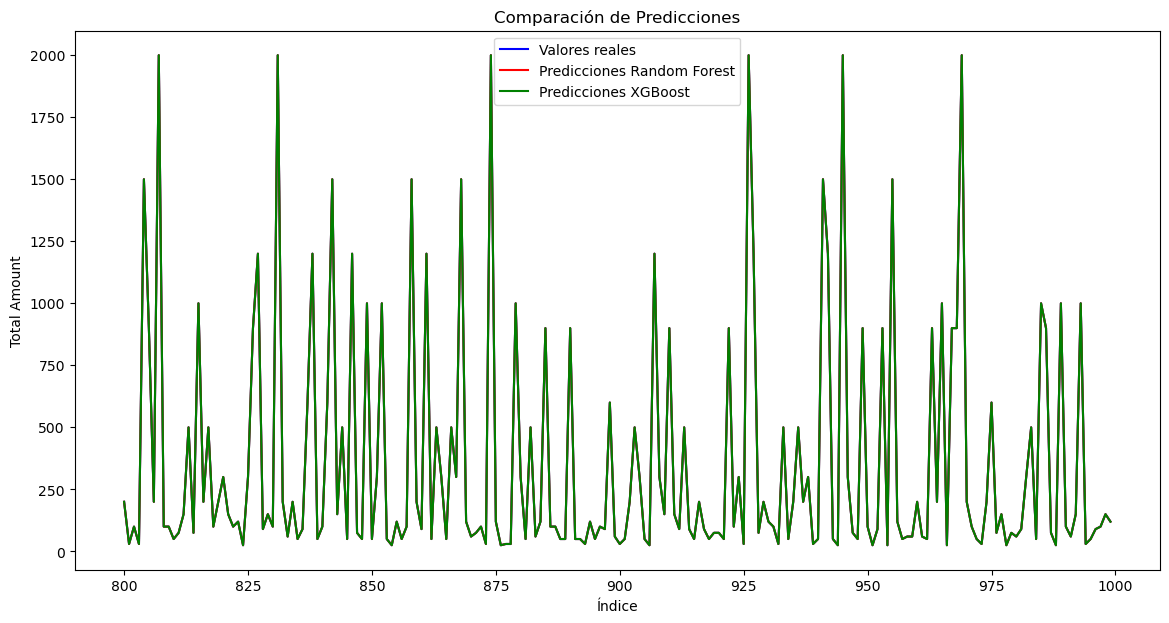

In [16]:
# Comparar resultados
print(f'Random Forest - MSE: {rf_mse}, MAE: {rf_mae}')
print(f'XGBoost - MSE: {xgb_mse}, MAE: {xgb_mae}')

# Visualización de predicciones
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Valores reales', color='blue')
plt.plot(y_test.index, rf_predictions, label='Predicciones Random Forest', color='red')
plt.plot(y_test.index, xgb_predictions, label='Predicciones XGBoost', color='green')
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Total Amount')
plt.title('Comparación de Predicciones')
plt.show()

**Paso 5: Validación cruzada**

Realizar validación cruzada para obtener una evaluación más robusta del desempeño de los modelos.

In [13]:
# Validación cruzada para Random Forest
rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest - CV Mean Squared Error: {-rf_cv_scores.mean()}')

# Validación cruzada para XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'XGBoost - CV Mean Squared Error: {-xgb_cv_scores.mean()}')

Random Forest - CV Mean Squared Error: -0.0
XGBoost - CV Mean Squared Error: 1.0864609066629782e-08
